In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to smooth the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny Edge Detector
    edges = cv2.Canny(blur, 50, 150)
    
    return edges


In [3]:
def region_of_interest(image):
    height = image.shape[0]
    width = image.shape[1]
    
    # Define a polygon that corresponds to the region of interest
    polygons = np.array([
        [(0, height), (width, height), (width // 2, height // 2)]
    ])
    
    # Create a mask of the same size as the image, filled with zeros
    mask = np.zeros_like(image)
    
    # Fill the polygon with white color
    cv2.fillPoly(mask, polygons, 255)
    
    # Mask the image
    masked_image = cv2.bitwise_and(image, mask)
    
    return masked_image


In [4]:
def detect_lane_lines(image):
    # Apply Hough Transform to detect lines
    lines = cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)
    
    return lines


In [5]:
def draw_lines(image, lines):
    line_image = np.zeros_like(image)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    
    # Combine the original image with the line image
    combined_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    
    return combined_image

In [6]:
def process_frame(frame):
    # Preprocess the frame
    edges = preprocess_image(frame)
    
    # Define the region of interest
    roi = region_of_interest(edges)
    
    # Detect lane lines
    lines = detect_lane_lines(roi)
    
    # Draw the lane lines on the original frame
    result = draw_lines(frame, lines)
    
    return result

In [7]:
def detect_lanes_in_video(video_path, output_path):
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define the codec and create VideoWriter object
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process the frame to detect lane lines
        result_frame = process_frame(frame)
        
        # Write the frame to the output video
        out.write(result_frame)
    
    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
detect_lanes_in_video('input_video.mp4', 'output_video.avi')


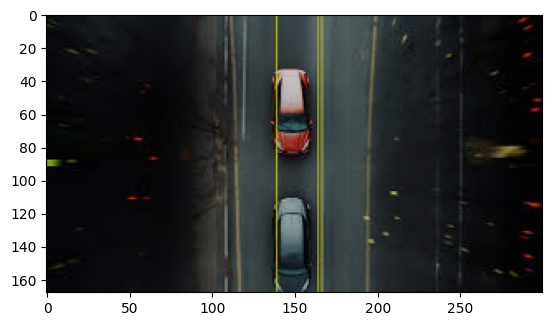

In [10]:
# Load an image
image = cv2.imread('road.jfif')

# Process the image
result = process_frame(image)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
